In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 


**Loading Dataset**

In [3]:
Sierraleone_Dataset= pd.read_csv(r'C:\Users\hp\solar-challenge-week1\data\sierraleone-bumbuna.csv')

In [4]:
Sierraleone_Dataset.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [5]:
Sierraleone_Dataset.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [6]:
Sierraleone_Dataset.isna()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
525596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
525597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
525598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [7]:
Sierraleone_Dataset.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:
Missing_value=Sierraleone_Dataset.isna().sum()
X=0.05*len(Sierraleone_Dataset)

Missing_Value=Missing_value[Missing_value > X]
print(Missing_Value)


Comments    525600
dtype: int64


**Outlier Detection & Basic Cleaning**

In [9]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores=Sierraleone_Dataset[columns_to_check].apply(zscore).abs()
Outliers=Sierraleone_Dataset[z_scores>3].any(axis=1)
print(Outliers)

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool


In [10]:
print('Number of Outliers:' , Outliers.sum())

Number of Outliers: 16292


In [11]:
#fill outliers with Median value of the column
for col in columns_to_check:
    median_val = Sierraleone_Dataset[col].median()
    Sierraleone_Dataset.loc[z_scores[col] > 3, col] = median_val

In [12]:
Sierraleone_Dataset.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [13]:
#fill NA values with Median value of the column
Sierraleone_Dataset[columns_to_check]=Sierraleone_Dataset[columns_to_check].fillna(Sierraleone_Dataset[col].median())
Sierraleone_Dataset.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [14]:
Sierraleone_Dataset.to_csv("data\Sierraleone_Dataset_Clean.csv",index=False)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\hp\AppData\Local\Temp\ipykernel_4680\1654515504.py:1: SyntaxWarning: invalid escape sequence '\S'
  Sierraleone_Dataset.to_csv("data\Sierraleone_Dataset_Clean.csv",index=False)


**Time Series Analysis**

In [15]:
Sierraleone_Dataset['Timestamp']=pd.to_datetime(Sierraleone_Dataset['Timestamp'])
Sierraleone_Dataset.set_index('Timestamp', inplace=True)

c:\Users\hp\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


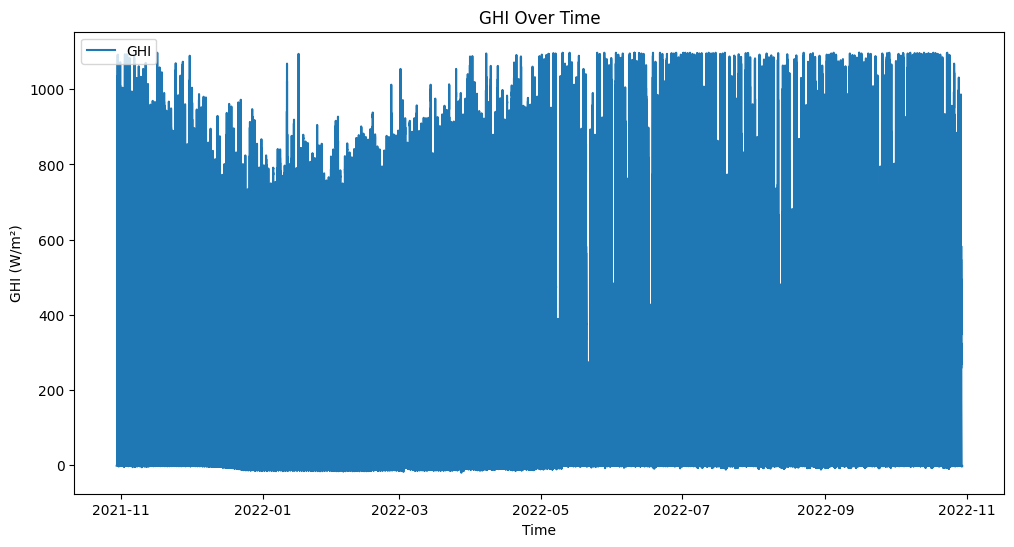

In [16]:
plt.figure(figsize=(12,6))
plt.plot(Sierraleone_Dataset.index, Sierraleone_Dataset['GHI'], label='GHI')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.title('GHI Over Time')
plt.legend()
plt.show()

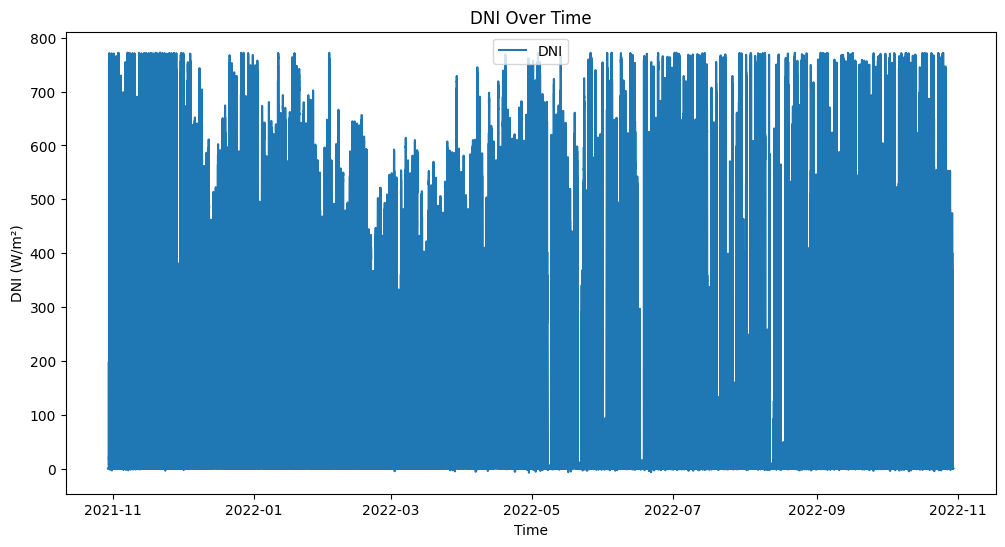

In [17]:
plt.figure(figsize=(12,6))
plt.plot(Sierraleone_Dataset.index, Sierraleone_Dataset['DNI'], label='DNI')
plt.xlabel('Time')
plt.ylabel('DNI (W/m²)')
plt.title('DNI Over Time')
plt.legend()
plt.show()

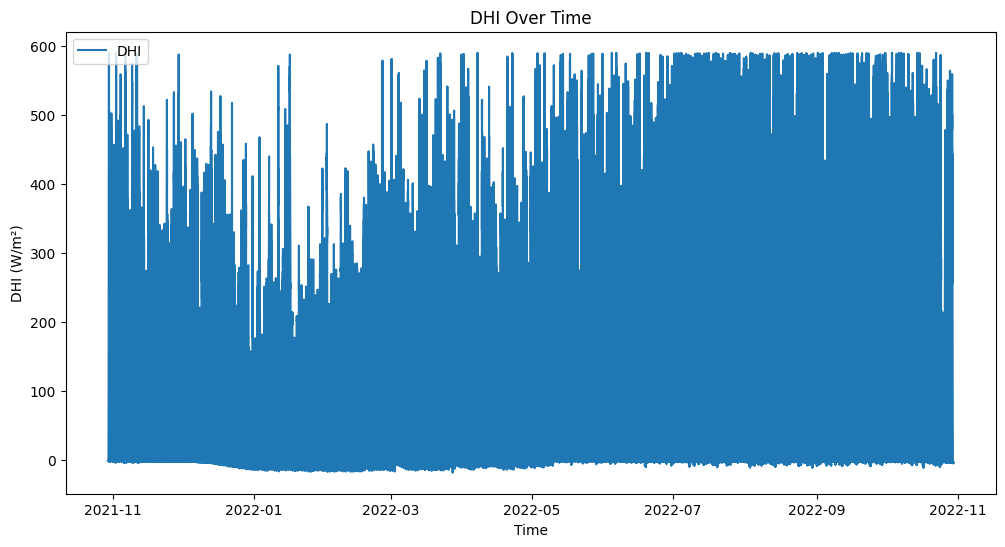

In [18]:
plt.figure(figsize=(12,6))
plt.plot(Sierraleone_Dataset.index, Sierraleone_Dataset['DHI'], label='DHI')
plt.xlabel('Time')
plt.ylabel('DHI (W/m²)')
plt.title('DHI Over Time')
plt.legend()
plt.show()

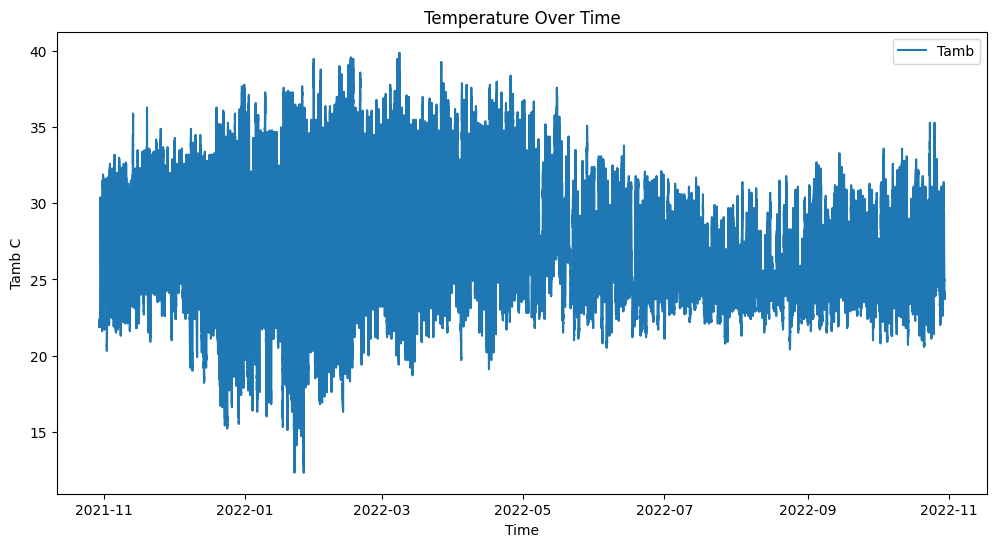

In [19]:
plt.figure(figsize=(12,6))
plt.plot(Sierraleone_Dataset.index, Sierraleone_Dataset['Tamb'], label='Tamb')
plt.xlabel('Time')
plt.ylabel('Tamb C')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

c:\Users\hp\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


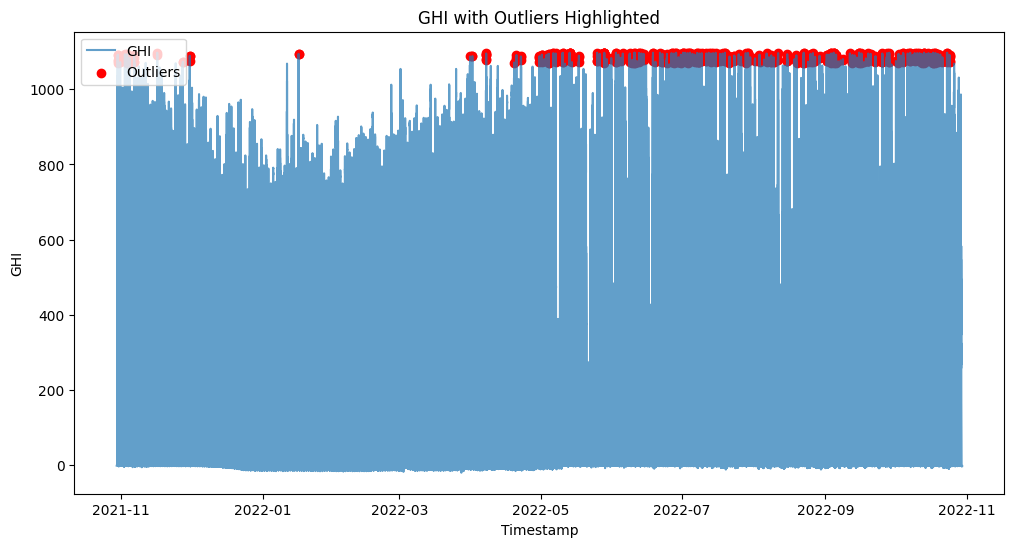

In [20]:
# Plot a snippet of time series with outliers
plt.figure(figsize=(12,6))
plt.plot(Sierraleone_Dataset.index, Sierraleone_Dataset['GHI'], label='GHI', alpha=0.7)

# Highlight suspected outliers (Z > 3)
outliers = Sierraleone_Dataset[np.abs(zscore(Sierraleone_Dataset['GHI'])) > 3]
plt.scatter(outliers.index, outliers['GHI'], color='red', label='Outliers')

plt.title('GHI with Outliers Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.legend()
plt.show()


In [21]:
outliers

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-30 11:03:00,1071.0,616.0,539.1,3.6,3.4,26.4,82.5,0.2,0.7,0.4,20.2,11.9,1002,0,0.0,59.3,51.8,NaN
2021-10-30 11:11:00,1092.0,667.1,507.6,3.6,3.4,27.0,83.4,2.0,2.6,0.4,57.0,11.6,1002,0,0.0,66.3,59.8,NaN
2021-10-30 12:50:00,1090.0,765.9,375.1,3.6,3.4,29.0,75.6,2.4,2.9,0.4,226.1,10.7,1001,0,0.0,54.4,52.3,NaN
2021-10-30 12:51:00,1078.0,-0.1,304.8,3.6,3.4,29.1,75.2,2.4,2.9,0.4,247.7,9.5,1001,0,0.0,55.9,53.5,NaN
2021-10-30 13:05:00,1075.0,662.0,464.6,3.6,3.4,30.1,73.2,2.9,4.1,0.4,242.6,8.8,1000,0,0.0,69.9,66.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24 13:12:00,1091.0,657.7,471.9,3.6,3.4,30.2,75.8,3.4,4.4,0.6,244.1,19.8,1001,0,0.0,55.7,56.4,NaN
2022-10-24 14:06:00,1072.0,754.8,413.3,1091.0,3.4,30.6,74.8,2.9,3.4,0.4,252.0,7.1,1000,0,0.0,52.7,56.4,NaN
2022-10-24 14:09:00,1085.0,737.7,447.3,3.6,3.4,30.4,74.1,1.7,3.1,1.1,265.9,16.3,1000,0,0.0,54.1,58.0,NaN


c:\Users\hp\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


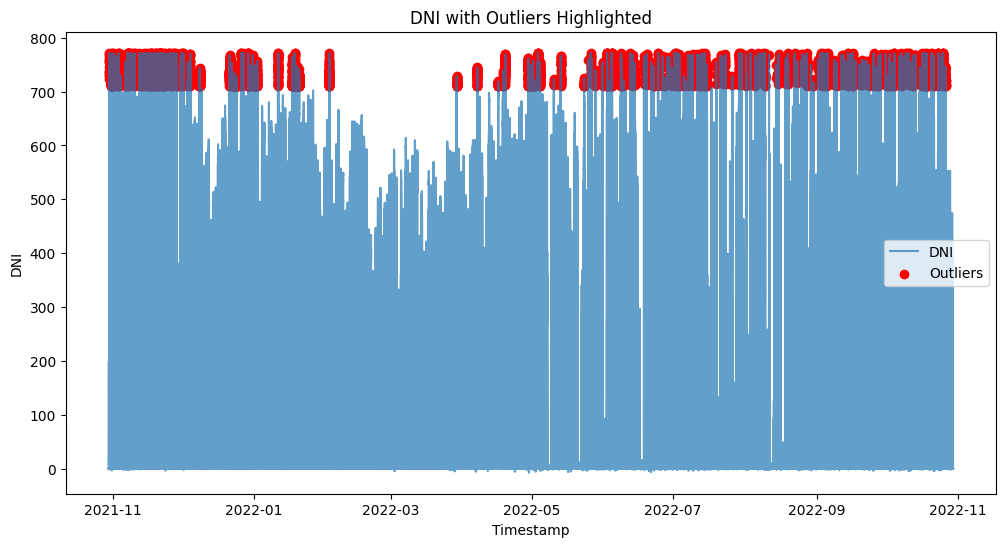

In [22]:
# Plot a snippet of time series with outliers
plt.figure(figsize=(12,6))
plt.plot(Sierraleone_Dataset.index, Sierraleone_Dataset['DNI'], label='DNI', alpha=0.7)

# Highlight suspected outliers (Z > 3)
outliers = Sierraleone_Dataset[np.abs(zscore(Sierraleone_Dataset['DNI'])) > 3]
plt.scatter(outliers.index, outliers['DNI'], color='red', label='Outliers')

plt.title('DNI with Outliers Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('DNI')
plt.legend()
plt.show()


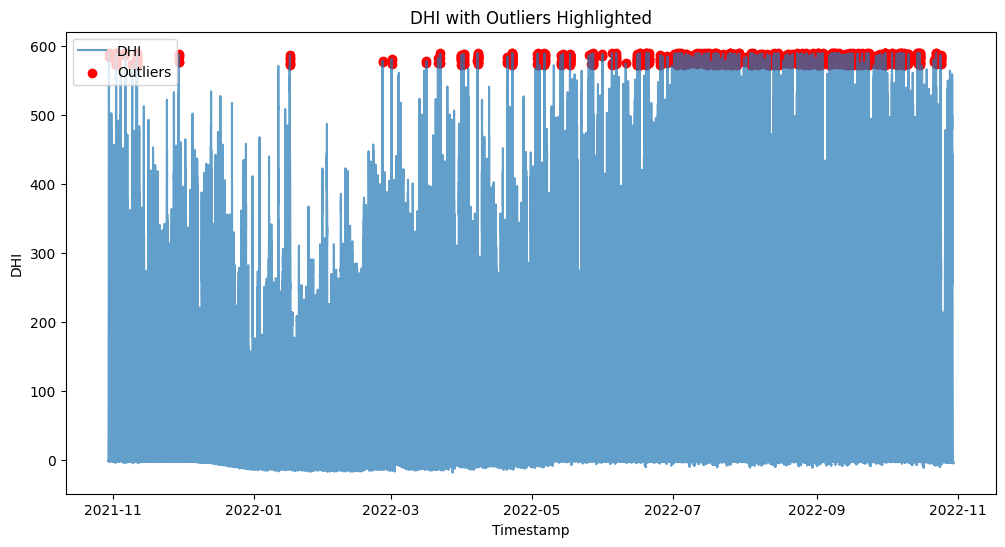

In [23]:
# Plot a snippet of time series with outliers
plt.figure(figsize=(12,6))
plt.plot(Sierraleone_Dataset.index, Sierraleone_Dataset['DHI'], label='DHI', alpha=0.7)

# Highlight suspected outliers (Z > 3)
outliers = Sierraleone_Dataset[np.abs(zscore(Sierraleone_Dataset['DHI'])) > 3]
plt.scatter(outliers.index, outliers['DHI'], color='red', label='Outliers')

plt.title('DHI with Outliers Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('DHI')
plt.legend()
plt.show()


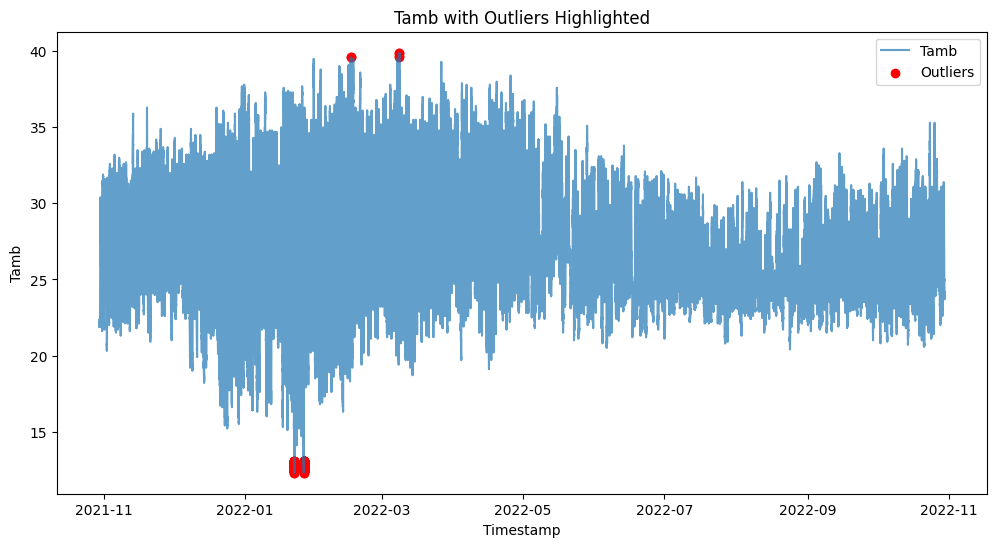

In [24]:
# Plot a snippet of time series with outliers
plt.figure(figsize=(12,6))
plt.plot(Sierraleone_Dataset.index, Sierraleone_Dataset['Tamb'], label='Tamb', alpha=0.7)

# Highlight suspected outliers (Z > 3)
outliers = Sierraleone_Dataset[np.abs(zscore(Sierraleone_Dataset['Tamb'])) > 3]
plt.scatter(outliers.index, outliers['Tamb'], color='red', label='Outliers')

plt.title('Tamb with Outliers Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('Tamb')
plt.legend()
plt.show()


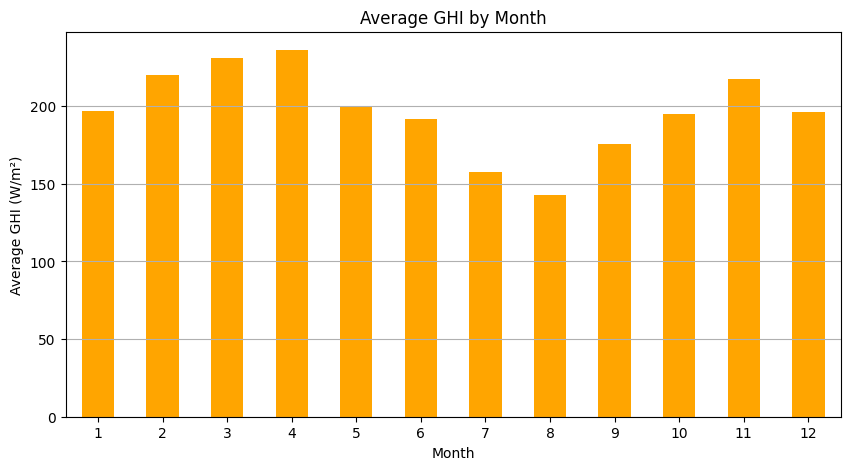

In [25]:
# Add a 'Month' column
Sierraleone_Dataset['Month'] = Sierraleone_Dataset.index.month

# Average GHI by month
monthly_ghi = Sierraleone_Dataset.groupby('Month')['GHI'].mean()

# Plot
plt.figure(figsize=(10,5))
monthly_ghi.plot(kind='bar', color='orange')
plt.title('Average GHI by Month')
plt.xlabel('Month')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


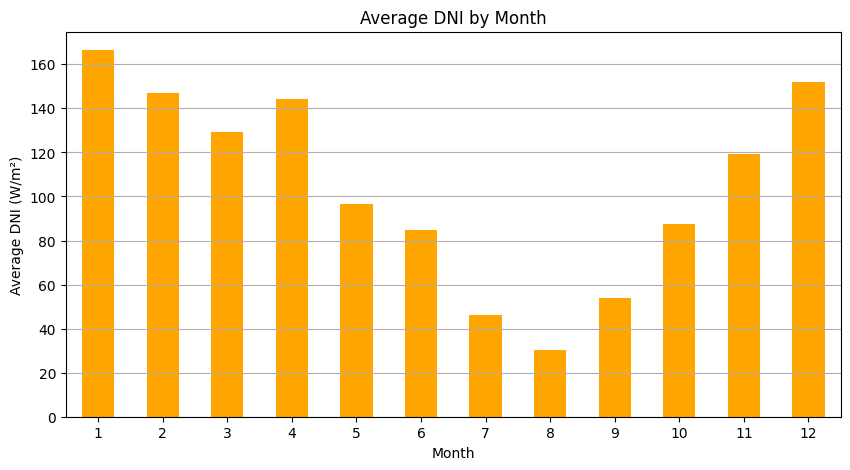

In [26]:
# Add a 'Month' column
Sierraleone_Dataset['Month'] = Sierraleone_Dataset.index.month

# Average DNI by month
monthly_ghi = Sierraleone_Dataset.groupby('Month')['DNI'].mean()

# Plot
plt.figure(figsize=(10,5))
monthly_ghi.plot(kind='bar', color='orange')
plt.title('Average DNI by Month')
plt.xlabel('Month')
plt.ylabel('Average DNI (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


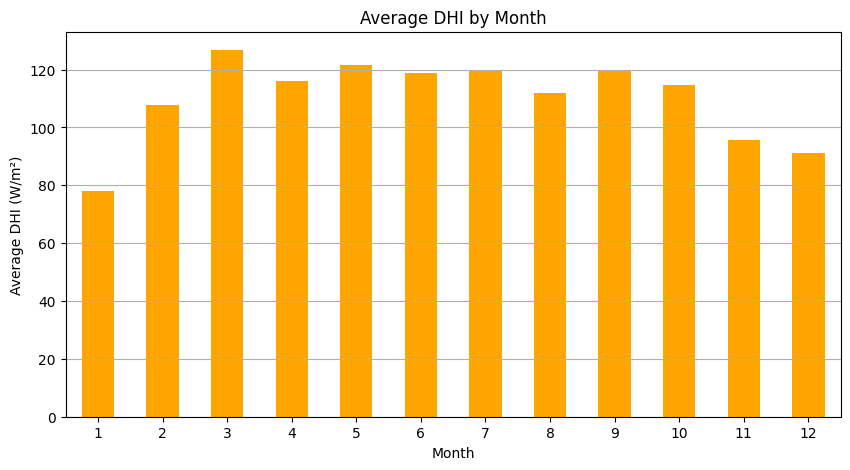

In [27]:
# Add a 'Month' column
Sierraleone_Dataset['Month'] = Sierraleone_Dataset.index.month

# Average DHI by month
monthly_ghi = Sierraleone_Dataset.groupby('Month')['DHI'].mean()

# Plot
plt.figure(figsize=(10,5))
monthly_ghi.plot(kind='bar', color='orange')
plt.title('Average DHI by Month')
plt.xlabel('Month')
plt.ylabel('Average DHI (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


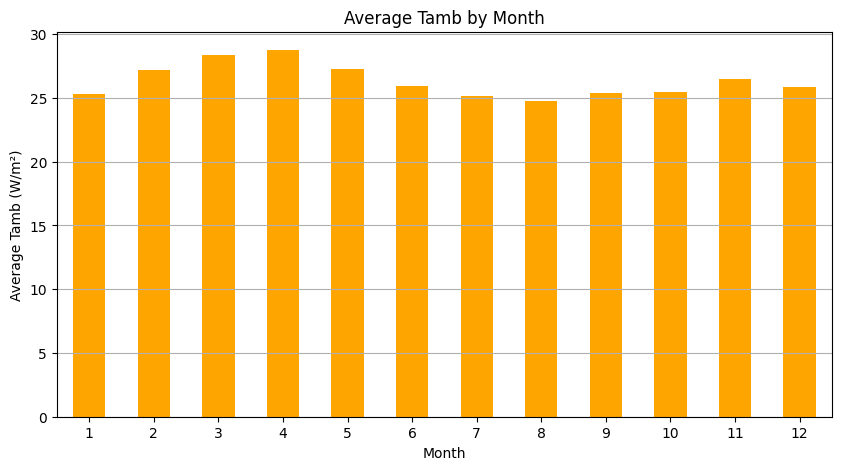

In [28]:
# Add a 'Month' column
Sierraleone_Dataset['Month'] = Sierraleone_Dataset.index.month

# Average Tamb by month
monthly_ghi = Sierraleone_Dataset.groupby('Month')['Tamb'].mean()

# Plot
plt.figure(figsize=(10,5))
monthly_ghi.plot(kind='bar', color='orange')
plt.title('Average Tamb by Month')
plt.xlabel('Month')
plt.ylabel('Average Tamb (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


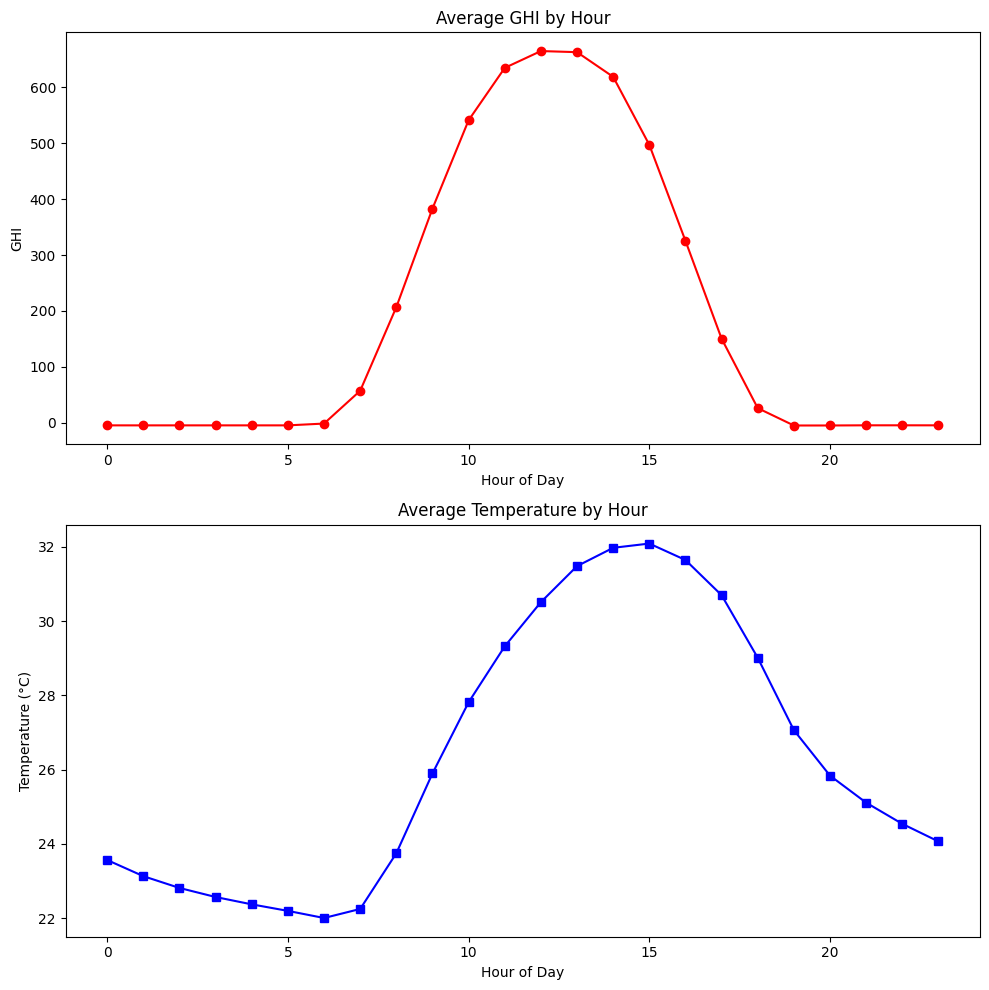

In [29]:
# Add 'Hour' column
Sierraleone_Dataset['Hour'] = Sierraleone_Dataset.index.hour

# Average values by hour
hourly_ghi = Sierraleone_Dataset.groupby('Hour')['GHI'].mean()
hourly_temp = Sierraleone_Dataset.groupby('Hour')['Tamb'].mean()

# Plot both in subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(hourly_ghi, marker='o', color='red')
axs[0].set_title('Average GHI by Hour')
axs[0].set_xlabel('Hour of Day')
axs[0].set_ylabel('GHI')

axs[1].plot(hourly_temp, marker='s', color='blue')
axs[1].set_title('Average Temperature by Hour')
axs[1].set_xlabel('Hour of Day')
axs[1].set_ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()


**Cleaning Impact**

In [30]:

# Define which columns to check for outliers
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute z-scores
z_scores = Sierraleone_Dataset[cols_to_check].apply(zscore)

# Flag outliers: if any value across the row has |z| > 3, it's an outlier
Sierraleone_Dataset['Cleaning_Flag'] = (z_scores.abs() > 3).any(axis=1)


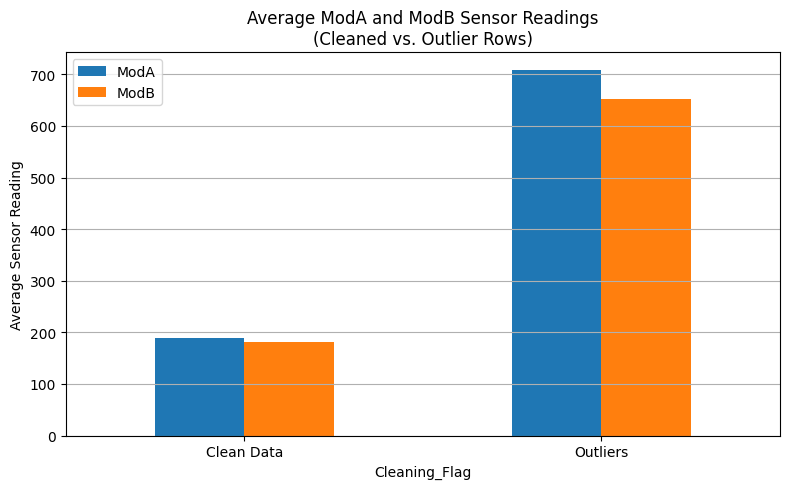

In [31]:
import matplotlib.pyplot as plt

# Group by cleaning flag (False = clean, True = outlier)
grouped = Sierraleone_Dataset.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean()

# Bar plot
grouped.plot(kind='bar', figsize=(8,5))
plt.title('Average ModA and ModB Sensor Readings\n(Cleaned vs. Outlier Rows)')
plt.xticks([0, 1], labels=['Clean Data', 'Outliers'], rotation=0)
plt.ylabel('Average Sensor Reading')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Correlation & Relationship Analysis**

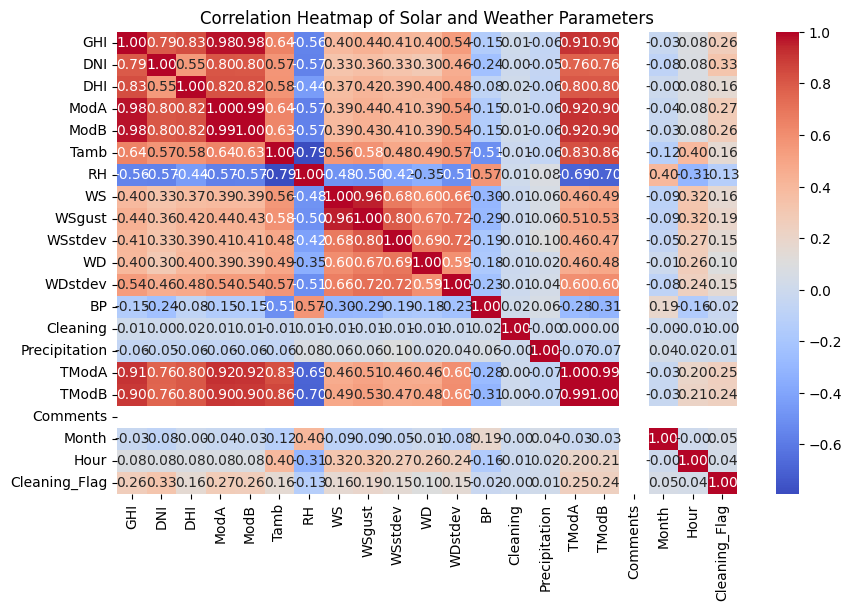

In [32]:
# Compute correlation matrix
correlation_matrix = Sierraleone_Dataset.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Solar and Weather Parameters")
plt.show()

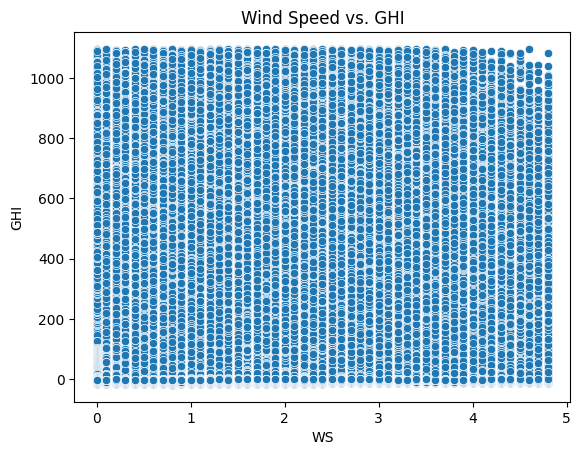

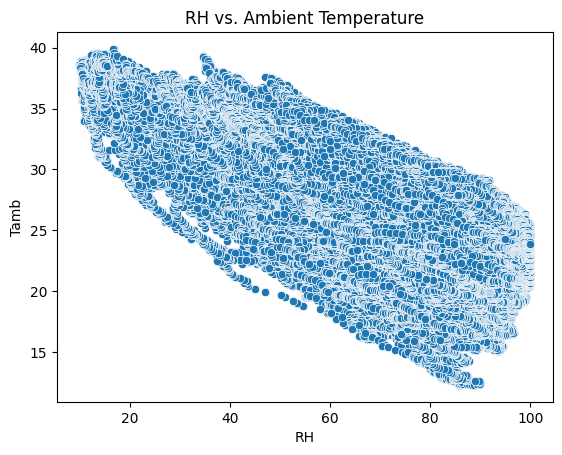

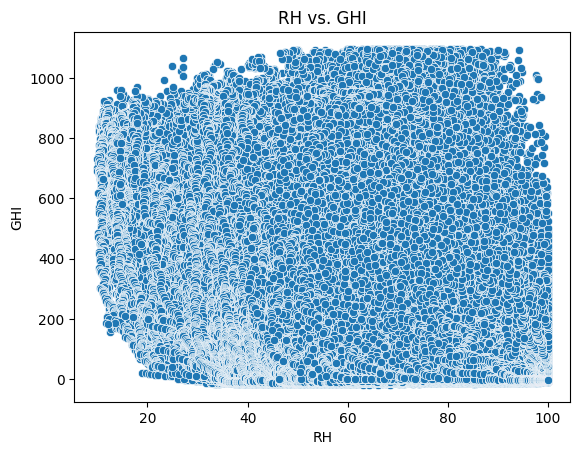

In [33]:
# Scatter: Wind speed vs. GHI
sns.scatterplot(data=Sierraleone_Dataset, x='WS', y='GHI')
plt.title("Wind Speed vs. GHI")
plt.show()

# Scatter: Relative Humidity vs. Ambient Temperature
sns.scatterplot(data=Sierraleone_Dataset, x='RH', y='Tamb')
plt.title("RH vs. Ambient Temperature")
plt.show()

# Scatter: Relative Humidity vs. GHI
sns.scatterplot(data=Sierraleone_Dataset, x='RH', y='GHI')
plt.title("RH vs. GHI")
plt.show()


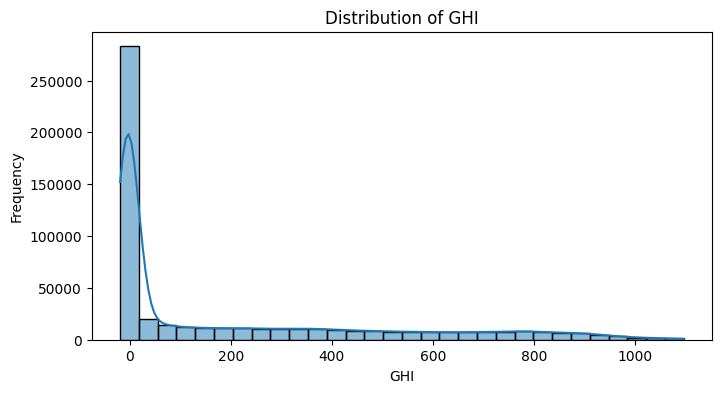

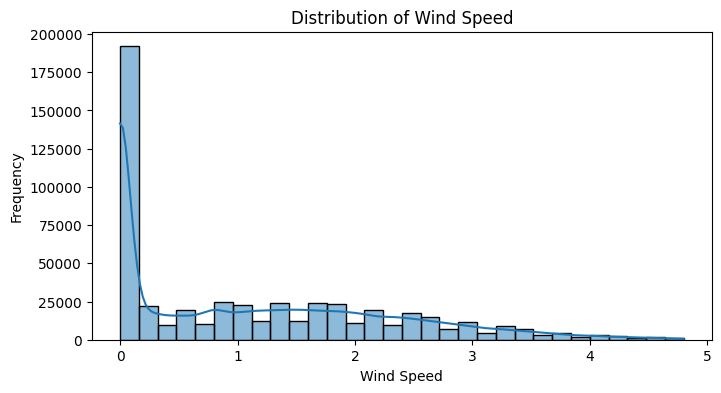

In [35]:
# Histogram for GHI
plt.figure(figsize=(8, 4))
sns.histplot(Sierraleone_Dataset['GHI'], bins=30, kde=True)
plt.title("Distribution of GHI")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram for WS (Wind Speed)
plt.figure(figsize=(8, 4))
sns.histplot(Sierraleone_Dataset['WS'], bins=30, kde=True)
plt.title("Distribution of Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.show()
